In [1]:
import numpy as np
from math import *

In [2]:
A0 = 10 ** 6
r0 = 0.0435 / 12
T0 = 12 * 30

# 等额本息


def money_monthly1(A=A0, r=r0, T=T0):
    """等额本息的每月还款额"""
    m = (A * r * (1 + r) ** T) / ((1 + r) ** T - 1)
    return m


def total_money_monthly1(m, A=A0, r=r0, T=T0):
    """等额本息的每月累计还款额"""
    i_m = m * money_monthly1(A, r, T)
    return i_m

# 等额本金


def money_monthly2(m, A=A0, r=r0, T=T0):
    """等额本金的每月还款额"""
    m = A / T * (1 + (T - m + 1) * r)
    return m


def total_money_monthly2(m, A=A0, r=r0, T=T0):
    """等额本金的每月累计还款额"""
    i_m = A * m / T + A * m * r * (2 * T - m + 1) / (2 * T)
    return i_m

In [3]:
print('等额本息每月还款额:', money_monthly1(), '累计还款额:', total_money_monthly1(T0))
print('等额本金每月还款额:', total_money_monthly2(T0) / T0, '累计还款额:', total_money_monthly2(T0))

等额本息每月还款额: 4978.117927162652 累计还款额: 1792122.453778555
等额本金每月还款额: 4595.3125 累计还款额: 1654312.5


In [4]:
import matplotlib.pyplot as plt

x = list(range(1, 361))
# 每月还款额
y1 = [money_monthly1()] * 360
y2 = [money_monthly2(i) for i in x]
# 每月累计还款额
y3 = [total_money_monthly1(i) for i in x]
y4 = [total_money_monthly2(i) for i in x]

In [5]:
plt.rcParams['font.sans-serif']=['SimHei']

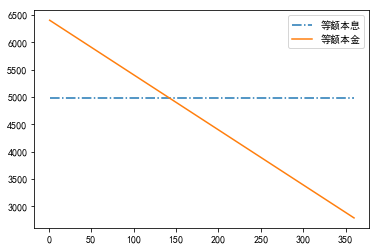

In [6]:
plt.plot(x, y1, '-.', label='等额本息')
plt.plot(x, y2, label='等额本金')
plt.legend()
plt.show()

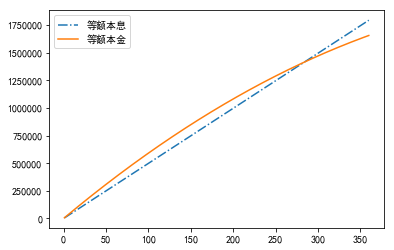

In [7]:
plt.plot(x, y3, '-.', label='等额本息')
plt.plot(x, y4, label='等额本金')
plt.legend()
plt.show()

In [8]:
# 推广的计算，除了等额本息时的利率


def duration_min1(m_limit, A=A0, r=0.0435):
    """返回等额本金时的最小期限"""
    n_min = A / (12 * m_limit - A * r)
    return n_min

def rate_max1(m_limit, A=A0, n=30):
    """返回等额本金时的最大利率"""
    r_max = 12 * m_limit / A - 1 / n
    return r_max

def duration_min2(m_limit, A=A0, r=r0):
    """返回等额本息时的最小期限"""
    n_min = (log(m_limit) - log(m_limit - A * r)) / (12 * log(1 + r))
    return n_min

In [9]:
# 牛顿法求等额本息时最大利率


def rate_equation(r, m_limit, A, n):
    """决定最大月利率的函数"""
    f_r = A * r * (1 + r) ** (12 * n) - m_limit * (1 + r) ** (12 * n) + m_limit
    return f_r


def rate_equation_derivative(r, m_limit, A, n):
    """利率函数的导函数"""
    f_r_prime = A * (1 + r) ** (12 * n) + 12 * n * (A * r - m_limit) * (1 + r) ** (12 * n - 1)
    return f_r_prime


def rate_solve(x0, m_limit, A, n, alpha=0.01, epslion=1e-6, max_num=100):
    """牛顿法求利率函数零点"""
    x = x0
#     i = 0
    while abs(rate_equation(x, m_limit, A, n)) > epslion:
#     while (abs(rate_equation(x, m_limit, A, n)) > epslion) and (i <= max_num):
        step = rate_equation(x, m_limit, A, n) / rate_equation_derivative(x, m_limit, A, n)
        x = x - alpha * step
#         i += 1
    
    return x


def rate_max2(m_limit, x0=0.05, A=A0, n=30):
    """返回等额本息时的最大利率"""
    r = rate_solve(x0, m_limit, A, n)
    r_max = 12 * r
    return r_max

In [10]:
mLimit = 7500
print('等额本金时，最小期限:', duration_min1(mLimit), '最大利率:', rate_max1(mLimit))
print('等额本息时，最小期限:', duration_min2(mLimit), '最大利率:', rate_max2(mLimit))

等额本金时，最小期限: 21.50537634408602 最大利率: 0.056666666666666664
等额本息时，最小期限: 15.208127209880873 最大利率: 0.08231977781482319
